In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
import ipywidgets
warnings.filterwarnings("ignore")

In [2]:
Patients_df=pd.read_excel("HospitalDatabase .xlsx","Patients")

In [13]:
Discharges_df=pd.read_excel("HospitalDatabase .xlsx","Discharges")

In [4]:
EDVisits = pd.read_excel("HospitalDatabase .xlsx", "EDVisits")

In [5]:
AmbulatoryVisits_df = pd.read_excel("HospitalDatabase .xlsx", "AmbulatoryVisits")

In [6]:
Providers_df = pd.read_excel("HospitalDatabase .xlsx", "Providers")

In [7]:
EDUnique_df = pd.read_excel("HospitalDatabase .xlsx", "EDUnique")

In [8]:
ReAdmissionRegistry_df = pd.read_excel("HospitalDatabase .xlsx", 'ReAdmissionRegistry')

### Q1.Loop through rows of a data frame to find the last names of patient.

In [9]:
# Loop through rows of a data frame to find the last names of patient.
for (index, row) in Patients_df.iterrows():
    if row.FirstName == "Carmine":
        print(row.LastName)


Texas
Steuhlmeyer


### Q2. Grouped Bar Chart : To find the number of patients discharged by Primary diagnosis


In [10]:
Exp_home_tra = Discharges_df.groupby(["PrimaryDiagnosis", "DischargeDisposition"], as_index=False).agg({'PatientID': pd.Series.count})
Exp_home_tra.head()


PrimaryDiagnosis DischargeDisposition  PatientID
0              AMI              Expired          6
1              AMI                 Home         42
2             Afib              Expired          4
3             Afib                 Home          6
4             Afib             Transfer          1

In [11]:
import plotly.express as px
g_bar = px.bar(Exp_home_tra,
               x='PrimaryDiagnosis',
               y='PatientID',
               title='DischargeDisposition by PrimaryDiagnosis',
               color='DischargeDisposition',
               barmode='group')
 
g_bar.update_layout(xaxis_title='PrimaryDiagnosis',
                    yaxis_title='Number of Patients',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()



### Q3 . Applying indicator flag in merging the dataframes.


In [14]:
"""Indicator Flag :adds a column to the output DataFrame called "_merge" with
     information on the source of each row. The column can be given a different
    name by providing a string argument. The column will have a Categorical
    type with the value of "left_only" for observations whose merge key only
     appears in the left DataFrame, "right_only" for observations
     whose merge key only appears in the right DataFrame, and "both"
     if the observation's merge key is found in both DataFrames."""

merge_df1=pd.merge(Patients_df,Discharges_df,on="PatientID",how="left",indicator=True)
merge_df1.head()


PatientID FirstName LastName             DateOfBirth Gender   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male  White   

  Language  AdmissionID AdmissionDate           DischargeDate  \
0  English        389.0    2018-01-01 2018-01-04 19:59:31.391   
1  English        635.0    2018-01-01 2018-01-04 21:28:51.898   
2  English        606.0    2018-01-01 2018-01-04 22:28:23.672   
3  English          NaN           NaT                     NaT   
4  English        587.0    2018-01-01 2018-01-05 05:47:04.933   

  DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                 Home       Hospitalist   Kidney Failure     6.717771   
1                 Home  General Medicine              Flu     3.825969   
2                 Home  General Medicine              Flu     3.382493   
3                  NaN               NaN              NaN          NaN   
4                 Home  General Medicine              Flu     3.763352   

   ExpectedMortality     _merge  
0           0.010046       both  
1           0.604562       both  
2           0.266137       both  
3                NaN  left_only  
4           0.307527       both

### Q4:details for patient who has maximum pulse (AmbalatoryVisits table)


In [15]:
print(AmbulatoryVisits_df['Pulse'].max())
AmbulatoryVisits_df['VisitDepartmentID'].loc[AmbulatoryVisits_df['Pulse'].idxmax()]


99.98646314


6

### Q5: Searching for patterns in Text using Regular Expressions


In [16]:
import re

# List of patterns to search for
patterns = ['term1', 'term2']

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

for pattern in patterns:
    print('Searching for "%s" in:\n "%s"\n' %(pattern,text))
    
    #Check for match
    if re.search(pattern,text):
        print('Match was found. \n')
    else:
        print('No Match was found.\n')


Searching for "term1" in:
 "This is a string with term1, but it does not have the other term."

Match was found. 

Searching for "term2" in:
 "This is a string with term1, but it does not have the other term."

No Match was found.



### Q6.Calling multiple columns from a dataframe


In [12]:
from pandas import DataFrame
DataFrame(Patients_df,columns=['FirstName','LastName'])


FirstName  LastName
0       Lanni       Sue
1         Far     Myers
2     Devlin    Michael
3     Carmine     Texas
4       Tann       Bama
..        ...       ...
940       Wat   Fideler
941    Wandie  Baythrop
942   Diahann   Smeeton
943  Panchito   Sharple
944     Walsh    Calvie

[945 rows x 2 columns]

### Q7.Calling Index


In [13]:
Patients_df.loc[3]


PatientID                               4
FirstName                         Carmine
LastName                            Texas
DateOfBirth    1968-10-15 03:32:13.635000
Gender                               Male
Race                                White
Language                          English
Name: 3, dtype: object

### Q8.For full list of ways to create DataFrames from various sources go to teh documentation for pandas:


In [14]:
import webbrowser
website = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html'
webbrowser.open(website)


True

### Q9.cross-tablulation (basically a special case of pivot-tables)


In [15]:
# Now we can create a cross-tabulation table, which is basically just a frequency table
ED_Dis = pd.merge(EDUnique_df, Discharges_df, how="inner",on= ['PatientID'])
pd.crosstab(ED_Dis.ReasonForVisit,ED_Dis.PrimaryDiagnosis,margins=True)


PrimaryDiagnosis     AMI  Afib  Broken Leg  Diabetes  Fever  Flu  \
ReasonForVisit                                                     
Accident               1     0           0         3      0    2   
Bleeding               2     1           0         5      0    3   
Car Accident           0     0           0         1      0    1   
Chest Pain             4     1           2         6      0    5   
Fever                  9     4           3         9      4   14   
Gun Shot               0     0           0         2      0    2   
Intoxication           1     0           0         1      2    0   
Laceration             0     0           0         1      1    3   
Migraine               9     0           1         7      1   12   
Pneumonia              9     2           1         7      7   17   
Shortness of Breath    8     0           0        10      1   10   
Stomach Ache           5     3           2        12      3   11   
All                   48    11           9        64     19   80   

PrimaryDiagnosis     Heart Failure  Hip Fracture  Hypertension  \
ReasonForVisit                                                   
Accident                         4             1             2   
Bleeding                         2             1             0   
Car Accident                     5             0             1   
Chest Pain                      14             1             5   
Fever                           13             5            10   
Gun Shot                         1             0             2   
Intoxication                     2             2             0   
Laceration                       2             1             1   
Migraine                         7             3             6   
Pneumonia                       15             3            10   
Shortness of Breath              6             2             7   
Stomach Ache                     7             4             6   
All                             78            23            50   

PrimaryDiagnosis     Kidney Failure  Knee Replacement  Laceration  Migraine  \
ReasonForVisit                                                                
Accident                          0                 0           0         0   
Bleeding                          1                 0           0         0   
Car Accident                      0                 0           0         0   
Chest Pain                        4                 2           2         0   
Fever                             3                 5           5         5   
Gun Shot                          1                 0           1         0   
Intoxication                      0                 1           1         0   
Laceration                        2                 0           2         1   
Migraine                          3                 8           6         0   
Pneumonia                         3                 2           3         2   
Shortness of Breath               1                 2           6         1   
Stomach Ache                      2                 3           3         3   
All                              20                23          29        12   

PrimaryDiagnosis     Pain  Pneumonia  Spinal Cord Injury  Stroke  All  
ReasonForVisit                                                         
Accident                0         10                   1       2   26  
Bleeding                1          3                   0       2   21  
Car Accident            0          3                   0       2   13  
Chest Pain              0         19                   0       9   74  
Fever                   0         26                   0      12  127  
Gun Shot                0          4                   0       0   13  
Intoxication            0          3                   0       4   17  
Laceration              0          2                   0       1   17  
Migraine                1         17                   0       7   88  
Pneumonia 

### Q10. Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)


In [19]:
ED_Dis = pd.merge(EDUnique_df, Discharges_df, how="inner",on= ['PatientID'])
#ED_Dis
ED_DS_col=ED_Dis[['Acuity','ExpectedLOS','ExpectedMortality']]


In [20]:
def max_to_min(arr):
    return arr.max() - arr.min()

# Let's group the ExpectedLOS by Acuity
new_ED_Dis = ED_DS_col.groupby('Acuity')

# Show
new_ED_Dis.describe()


ExpectedLOS                                                    \
             count      mean       std       min       25%       50%   
Acuity                                                                 
1            315.0  8.585416  4.017682  2.012974  4.804806  8.454551   
2            105.0  9.206928  3.768281  2.255705  6.179944  9.589547   
3             57.0  8.718132  4.143377  2.113955  4.980881  9.115077   
4             92.0  8.723305  4.042890  2.066409  5.791651  8.278707   
5            151.0  9.159557  4.208608  2.102909  5.512412  9.400155   

                             ExpectedMortality                                \
              75%        max             count      mean       std       min   
Acuity                                                                         
1       11.875306  16.998213             315.0  0.331946  0.238709  0.000006   
2       12.275702  16.306983             105.0  0.329204  0.231661  0.003276   
3       11.447056  16.472257              57.0  0.348660  0.234065  0.027630   
4       11.414540  16.851937              92.0  0.340164  0.241645  0.013965   
5       12.545226  16.785926             151.0  0.351704  0.246499  0.003621   

                                                
             25%       50%       75%       max  
Acuity                                          
1       0.136607  0.288694  0.493611  0.980886  
2       0.129200  0.277359  0.511591  0.920635  
3       0.120415  0.339072  0.528969  0.927417  
4       0.151843  0.312911  0.459556  0.989945  
5       0.151260  0.307602  0.465582  0.980479

In [21]:
# We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min value of the col
new_ED_Dis.agg(max_to_min)


ExpectedLOS  ExpectedMortality
Acuity                                
1         14.985239           0.980880
2         14.051278           0.917359
3         14.358302           0.899787
4         14.785528           0.975980
5         14.683017           0.976858

In [22]:
# We can also pass string methods through aggregate
new_ED_Dis.agg('mean')


ExpectedLOS  ExpectedMortality
Acuity                                
1          8.585416           0.331946
2          9.206928           0.329204
3          8.718132           0.348660
4          8.723305           0.340164
5          9.159557           0.351704

In [23]:
# Let's go back to the original dframe
ED_DS_col.head()

# WE can also use pivot tables instead of groupby

# Pivot table of Acuity
ED_DS_col.pivot_table(index=['Acuity'])


ExpectedLOS  ExpectedMortality
Acuity                                
1          8.585416           0.331946
2          9.206928           0.329204
3          8.718132           0.348660
4          8.723305           0.340164
5          9.159557           0.351704

<AxesSubplot:>

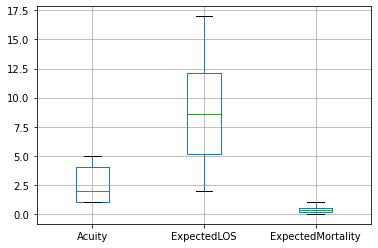

In [24]:
ED_DS_col.boxplot()


### Q11.Working on the DateofVisit column on AmbulatoryVisits_df


In [25]:
type(AmbulatoryVisits_df['DateofVisit'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [26]:
AmbulatoryVisits_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   VisitID                 950 non-null    int64         
 1   PatientMRN              950 non-null    int64         
 2   ProviderID              950 non-null    int64         
 3   DateofVisit             950 non-null    datetime64[ns]
 4   DateScheduled           950 non-null    datetime64[ns]
 5   VisitDepartmentID       950 non-null    int64         
 6   VisitType               950 non-null    object        
 7   BloodPressureSystolic   826 non-null    float64       
 8   BloodPressureDiastolic  826 non-null    float64       
 9   Pulse                   826 non-null    float64       
 10  VisitStatus             950 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 81.8+ KB


In [27]:
df_AmbulatoryVisits =AmbulatoryVisits_df.copy()
df_AmbulatoryVisits


VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0        202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1        436         820          25  2019-03-19 2019-02-24 07:10:31.043   
2        794         879          30  2019-04-02 2019-03-19 01:41:55.656   
3        799         884          37  2019-03-03 2019-02-25 01:25:39.696   
4        515          32          26  2019-03-16 2019-02-20 06:44:59.617   
..       ...         ...         ...         ...                     ...   
945      788         873           1  2019-03-27 2019-03-10 17:19:48.264   
946      703         855          36  2019-03-12 2019-02-19 02:27:52.664   
947      481         865          13  2019-05-03 2019-04-25 13:37:57.501   
948      398         635          10  2019-02-09 2019-02-08 11:40:35.137   
949      695         847          24  2019-03-04 2019-02-05 05:29:30.587   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10      Physical                  188.0   
1                    3     Follow Up                  179.0   
2                   11  Telemedicine                  133.0   
3                    4  Telemedicine                  132.0   
4                   11  Telemedicine                  131.0   
..                 ...           ...                    ...   
945                  5  Telemedicine                  187.0   
946                 10     Follow Up                  182.0   
947                 12           New                  150.0   
948                  1      Physical                  177.0   
949                 12     Follow Up                  165.0   

     BloodPressureDiastolic      Pulse VisitStatus  
0                144.143427  83.044920     No Show  
1                118.876808  90.309544     No Show  
2                 98.749563  80.859776     No Show  
3                 98.001270  82.184737     No Show  
4                 85.115632  89.192362     No Show  
..                      ...        ...         ...  
945              126.695141  70.049167    Canceled  
946              140.703502  73.380812    Canceled  
947               84.841197  61.625454    Canceled  
948              125.037534  53.287036    Canceled  
949              116.879318  56.180317    Canceled  

[950 rows x 11 columns]

##### Extract the Month value and create Month value column


In [28]:
df_AmbulatoryVisits['DateofVisit'][0]


Timestamp('2019-03-19 00:00:00')

In [29]:
df_AmbulatoryVisits['DateofVisit'][0].month


3

In [30]:
# Creating empty list
list_of_months = []
list_of_months


[]

In [31]:
df_AmbulatoryVisits.shape


(950, 11)

In [32]:
# iteratively extracting month values from the DateofVisit column(we have 950 rows in Dataset)
for i in range(df_AmbulatoryVisits.shape[0]):
    list_of_months.append(df_AmbulatoryVisits['DateofVisit'][i].month)
list_of_months


[3,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 4,
 1,
 1,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 4,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 1,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 1,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 4,
 2,
 4,
 4,
 3,
 2,
 1,
 4,
 2,
 2,
 3,
 3,
 4,
 2,
 2,
 4,
 2,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 5,
 3,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 3,
 3,
 4,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 4,
 2,
 1,
 3,
 1,
 3,
 4,
 3,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 1,
 4,


In [33]:
len(list_of_months)


950

In [34]:
# creating new column in our dataframe
df_AmbulatoryVisits['Month Value']=list_of_months
df_AmbulatoryVisits.head()
#### Extract the Day of the week and create


VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0      202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1      436         820          25  2019-03-19 2019-02-24 07:10:31.043   
2      794         879          30  2019-04-02 2019-03-19 01:41:55.656   
3      799         884          37  2019-03-03 2019-02-25 01:25:39.696   
4      515          32          26  2019-03-16 2019-02-20 06:44:59.617   

   VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                 10      Physical                  188.0   
1                  3     Follow Up                  179.0   
2                 11  Telemedicine                  133.0   
3                  4  Telemedicine                  132.0   
4                 11  Telemedicine                  131.0   

   BloodPressureDiastolic      Pulse VisitStatus  Month Value  
0              144.143427  83.044920     No Show            3  
1              118.876808  90.309544     No Show            3  
2               98.749563  80.859776     No Show            4  
3               98.001270  82.184737     No Show            3  
4               85.115632  89.192362     No Show            3

In [35]:
df_AmbulatoryVisits['DateofVisit'][949]


Timestamp('2019-03-04 00:00:00')

In [36]:
# 4th march of 2019 is sunday
df_AmbulatoryVisits['DateofVisit'][949].weekday()


0

In [37]:
def date_to_weekday(date_value):
    return date_value.weekday()


In [39]:
df_AmbulatoryVisits['Day of the week']=df_AmbulatoryVisits['DateofVisit'].apply(date_to_weekday)
df_AmbulatoryVisits


VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0        202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1        436         820          25  2019-03-19 2019-02-24 07:10:31.043   
2        794         879          30  2019-04-02 2019-03-19 01:41:55.656   
3        799         884          37  2019-03-03 2019-02-25 01:25:39.696   
4        515          32          26  2019-03-16 2019-02-20 06:44:59.617   
..       ...         ...         ...         ...                     ...   
945      788         873           1  2019-03-27 2019-03-10 17:19:48.264   
946      703         855          36  2019-03-12 2019-02-19 02:27:52.664   
947      481         865          13  2019-05-03 2019-04-25 13:37:57.501   
948      398         635          10  2019-02-09 2019-02-08 11:40:35.137   
949      695         847          24  2019-03-04 2019-02-05 05:29:30.587   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10      Physical                  188.0   
1                    3     Follow Up                  179.0   
2                   11  Telemedicine                  133.0   
3                    4  Telemedicine                  132.0   
4                   11  Telemedicine                  131.0   
..                 ...           ...                    ...   
945                  5  Telemedicine                  187.0   
946                 10     Follow Up                  182.0   
947                 12           New                  150.0   
948                  1      Physical                  177.0   
949                 12     Follow Up                  165.0   

     BloodPressureDiastolic      Pulse VisitStatus  Month Value  \
0                144.143427  83.044920     No Show            3   
1                118.876808  90.309544     No Show            3   
2                 98.749563  80.859776     No Show            4   
3                 98.001270  82.184737     No Show            3   
4                 85.115632  89.192362     No Show            3   
..                      ...        ...         ...          ...   
945              126.695141  70.049167    Canceled            3   
946              140.703502  73.380812    Canceled            3   
947               84.841197  61.625454    Canceled            5   
948              125.037534  53.287036    Canceled            2   
949              116.879318  56.180317    Canceled            3   

     Day of the week  
0                  1  
1                  1  
2                  1  
3                  6  
4                  5  
..               ...  
945                2  
946                1  
947                4  
948                5  
949                0  

[950 rows x 13 columns]

### Q12.Reverse the string without using inbuilt functions


In [40]:
#user-defined function
def findReverse(string):
   # find reverse of string
   reverse = string[::-1]
   return reverse

# take inputs
string = input('Enter the string: ')

# calling function and display result
reverse = findReverse(string)
print('The reverse string is', reverse)


Enter the string: Here is Numpy Ninja
The reverse string is ajniN ypmuN si ereH


In [41]:
# x[::-1]  is used to reverse the string of the column in pandas along with the apply function as shown below

Patients_df['First_Name'] = Patients_df.loc[:,'FirstName'].apply(lambda x: x[::-1])
Patients_df.head()


PatientID FirstName LastName             DateOfBirth Gender   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male  White   

  Language First_Name  
0  English      innaL  
1  English        raF  
2  English     nilveD  
3  English    enimraC  
4  English       nnaT

### Q13. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [42]:
PrimaryDiagnosis=ReAdmissionRegistry_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda x: (x.max() - x.min()))
PrimaryDiagnosis.nlargest(1)


PrimaryDiagnosis
Pneumonia    14.83426
Name: ExpectedLOS, dtype: float64

### Q14. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [43]:
Providers_df.groupby('ProviderSpecialty').size().reset_index().rename(columns={0:'Providers Count'})


ProviderSpecialty  Providers Count
0        Cardiology                8
1        Pediatrics                9
2       PrimaryCare               16
3           Surgery                7

In [44]:
ReAdmissionRegistry_df


AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Hospitalist   Kidney Failure     6.717771   
1                   Home  General Medicine              Flu     3.825969   
2                   Home  General Medicine              Flu     3.382493   
3                   Home  General Medicine              Flu     3.763352   
4                   Home               ICU    Heart Failure    13.650953   
..                   ...               ...              ...          ...   
715                 Home        Cardiology              AMI    13.725405   
716                 Home               ICU        Pneumonia    11.355456   
717                 Home       Hospitalist        Pneumonia     4.819882   
718                 Home  General Medicine              Flu     3.123064   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ReadmissionFlag  DaysToReadmission  \
0             0.010046              NaN                NaN   
1             0.604562              1.0                2.0   
2             0.266137              1.0                3.0   
3             0.307527              1.0                4.0   
4             0.408898              NaN                NaN   
..                 ...              ...                ...   
715           0.388319              NaN                NaN   
716           0.088518              NaN                NaN   
717           0.503308              NaN                NaN   
718           0.655870              NaN                NaN   
719           0.286439              NaN                NaN   

     EDVisitAfterDischargeFlag  
0                          NaN  
1                          1.0  
2                          1.0  
3                          1.0  
4                          NaN  
..                         ...  
715                        NaN  
716                        NaN  
717                        NaN  
718                        NaN  
719                        NaN  

[720 rows x 12 columns]

### Q15. Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)


In [45]:
ReAdmissionRegistry_df
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "patient_profile", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(ReAdmissionRegistry_df, head_rows=3, tail_rows=2)


'Data Head & Tail :'

AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Hospitalist   Kidney Failure     6.717771   
1                   Home  General Medicine              Flu     3.825969   
2                   Home  General Medicine              Flu     3.382493   
718                 Home  General Medicine              Flu     3.123064   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ReadmissionFlag  DaysToReadmission  \
0             0.010046              NaN                NaN   
1             0.604562              1.0                2.0   
2             0.266137              1.0                3.0   
718           0.655870              NaN                NaN   
719           0.286439              NaN                NaN   

     EDVisitAfterDischargeFlag  
0                          NaN  
1                          1.0  
2                          1.0  
718                        NaN  
719                        NaN

### Q16. Bubble Chart


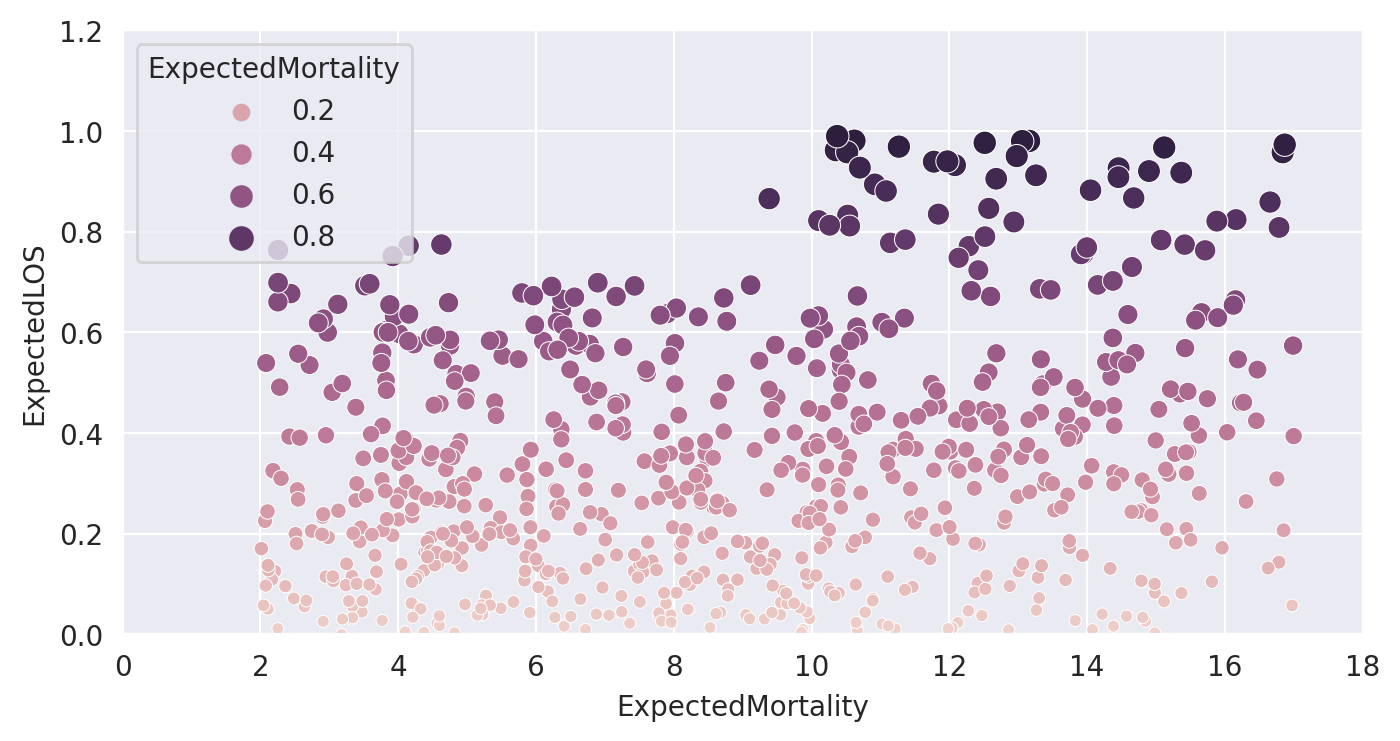

In [51]:
data_df=ReAdmissionRegistry_df
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_df,
                       x='ExpectedLOS', 
                       y='ExpectedMortality',
                       hue='ExpectedMortality',
                       size='ExpectedMortality')
  ax.set(ylim=(0, 1.2),
  xlim=(0, 18),
  ylabel='ExpectedLOS',
  xlabel='ExpectedMortality')
        
 


### Q17.Plotting Linear Regressions with Seaborn


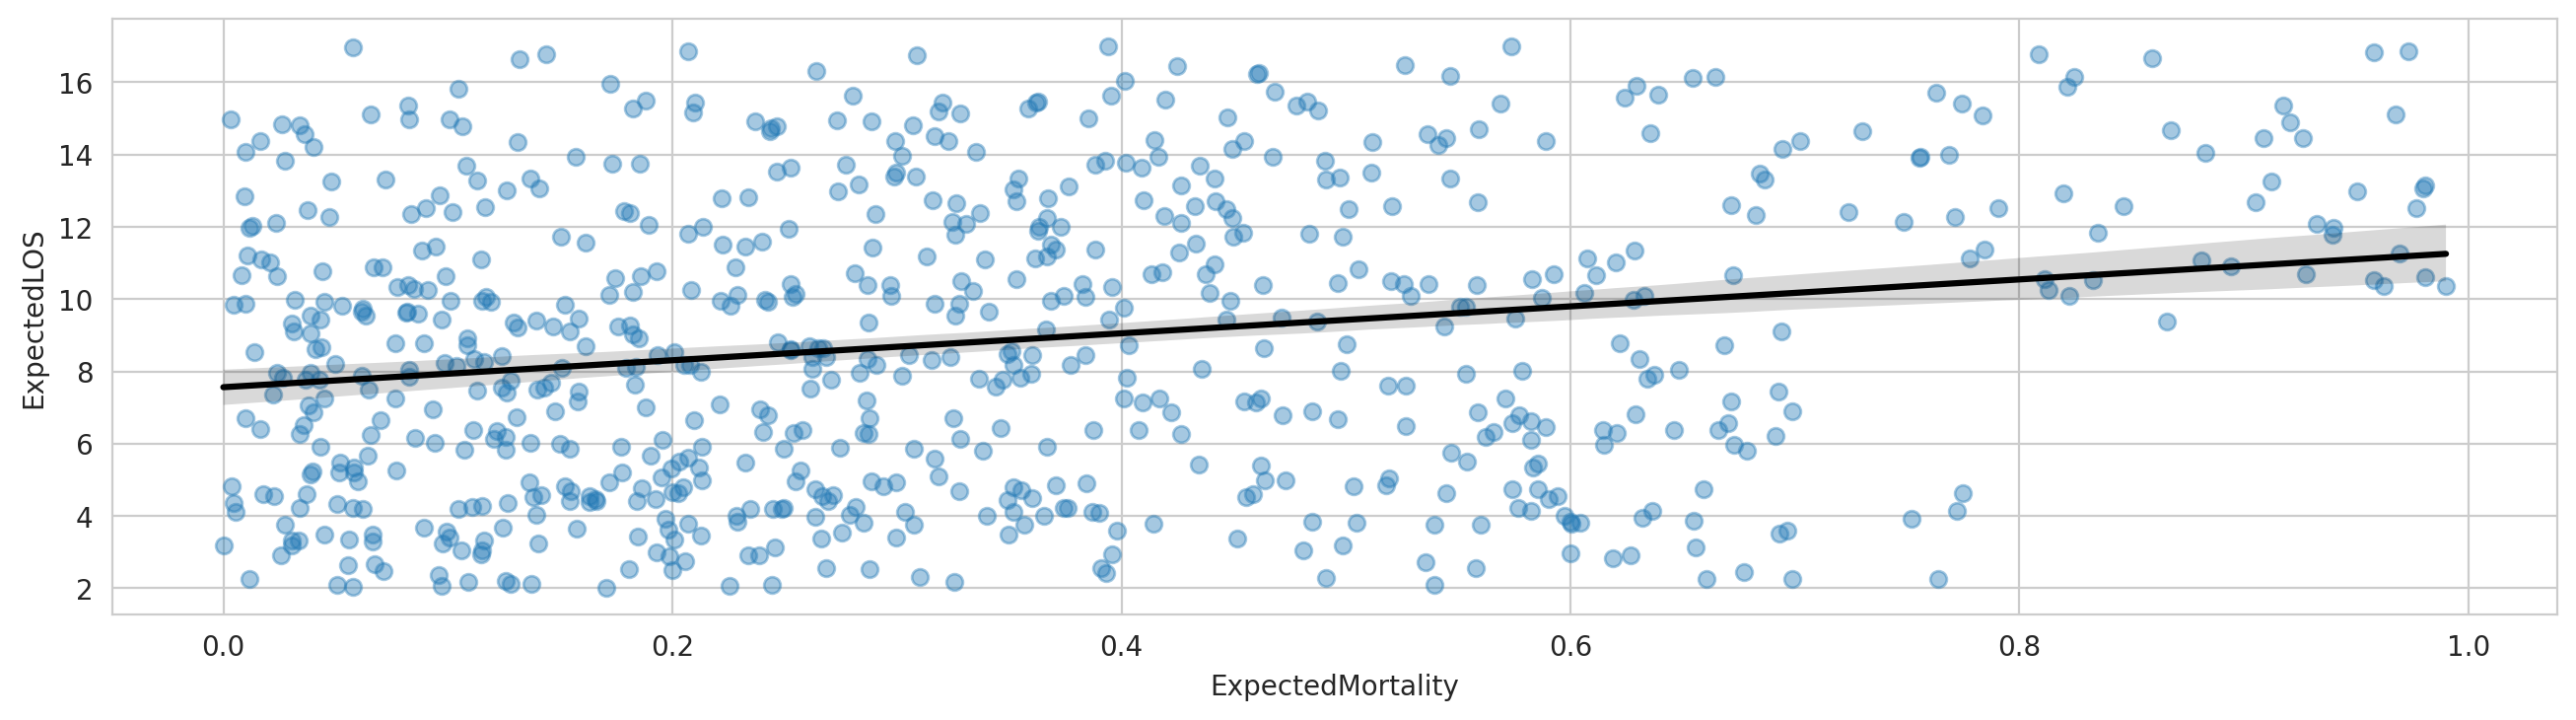

In [52]:
plt.figure(figsize=(16,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=ReAdmissionRegistry_df, 
            x='ExpectedMortality', 
            y='ExpectedLOS',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


### Q18.Number formats in the Output


In [53]:
ReAdmissionRegistry_df.describe()


AdmissionID   PatientID  ExpectedLOS  ExpectedMortality  \
count   720.000000  720.000000   720.000000         720.000000   
mean    360.500000  366.158333     8.824589           0.338063   
std     207.990384  218.223501     4.034421           0.238868   
min       1.000000    1.000000     2.012974           0.000006   
25%     180.750000  175.750000     5.138501           0.139771   
50%     360.500000  353.500000     8.633825           0.297242   
75%     540.250000  557.250000    12.107623           0.496387   
max     720.000000  742.000000    16.998213           0.989945   

       ReadmissionFlag  DaysToReadmission  EDVisitAfterDischargeFlag  
count            194.0         194.000000                      341.0  
mean               1.0           5.360825                        1.0  
std                0.0           3.866116                        0.0  
min                1.0           1.000000                        1.0  
25%                1.0           3.000000                        1.0  
50%                1.0           5.000000                        1.0  
75%                1.0           5.000000                        1.0  
max                1.0          19.000000                        1.0

In [54]:
pd.options.display.float_format = '{:,.2f}'.format


In [55]:
ReAdmissionRegistry_df.describe()


AdmissionID  PatientID  ExpectedLOS  ExpectedMortality  \
count       720.00     720.00       720.00             720.00   
mean        360.50     366.16         8.82               0.34   
std         207.99     218.22         4.03               0.24   
min           1.00       1.00         2.01               0.00   
25%         180.75     175.75         5.14               0.14   
50%         360.50     353.50         8.63               0.30   
75%         540.25     557.25        12.11               0.50   
max         720.00     742.00        17.00               0.99   

       ReadmissionFlag  DaysToReadmission  EDVisitAfterDischargeFlag  
count           194.00             194.00                     341.00  
mean              1.00               5.36                       1.00  
std               0.00               3.87                       0.00  
min               1.00               1.00                       1.00  
25%               1.00               3.00                       1.00  
50%               1.00               5.00                       1.00  
75%               1.00               5.00                       1.00  
max               1.00              19.00                       1.00

### Q19.Interactive Moon Plot

In [3]:
from sklearn.datasets import make_moons
#plt.figure(15,6)
def plot_moons(samples=200, noise=0):
    moons = make_moons(n_samples=samples, noise=noise, random_state=50)
    X, y = moons[0], moons[1]
    plt.scatter(X[:,0], X[:,1], c=y)
    

In [4]:
ipywidgets.interact(plot_moons, samples = [ 200 , 500 , 1000 ], noise= ( 0 , 2 , 0.025 ))


interactive(children=(Dropdown(description='samples', options=(200, 500, 1000), value=200), FloatSlider(value=…

<function __main__.plot_moons(samples=200, noise=0)>

### Q20. 3D Interactive Graph

In [5]:
import ipywidgets as widgets
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt 

def theta ( t ) :
    fig = plt.figure ( figsize =(10,15 ) )
    ax=plt.axes ( projection ='3d')
    z = np.linspace(0,t,500 )
    x = np.sin(z)
    y = np.cos(z)
    ax.plot3D(x,y,z,'red')
    plt.show ( )
widgets.interact (theta , t = widgets.Play (min=0,max=15));

interactive(children=(Play(value=0, description='t', max=15), Output()), _dom_classes=('widget-interact',))

### Q21. 3D Bar Charts

In [6]:
%matplotlib inline

<IPython.core.display.Javascript object>


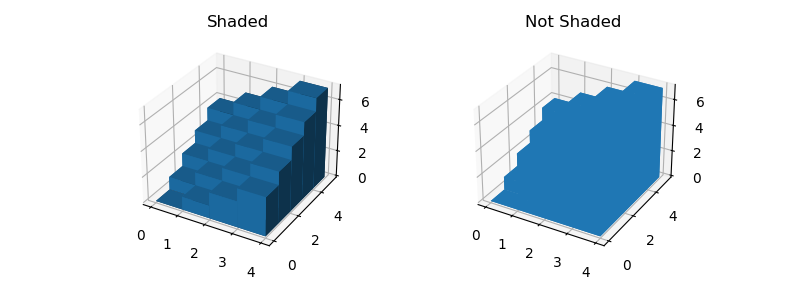

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection , but is otherwise unused .
from mpl_toolkits.mplot3d import Axes3D #noqa : F401 unused import
#setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection ='3d')
ax2 = fig.add_subplot(122, projection ='3d')
#fake data
_x = np.arange ( 4 )
_y = np.arange ( 5 )
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

### Q22.Created 2D Bar Graphs

<IPython.core.display.Javascript object>


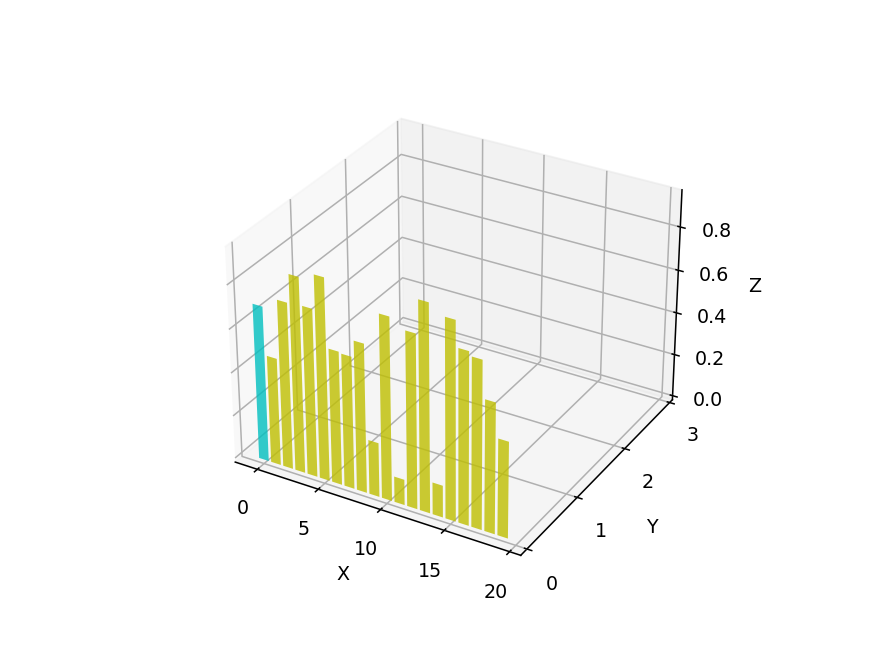

In [2]:
%matplotlib notebook
# This import registers the 3D projection , but is otherwise unused .
from mpl_toolkits.mplot3d import Axes3D #noqa : F401 unused import
import matplotlib.pyplot as plt
import numpy as np
# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
colors = ['r', 'g' , 'b' , 'y']
yticks = [3 , 2 , 1 , 0]
for c, k in zip(colors, yticks):
    
    #Generate the random data for the 
    xs = np.arange(20)
    ys = np.random.rand(20)

# You can provide either a single color or an array with the same Length as
# xs and ys . To demonstrate this , we color the first bar of each set cyan .
cs = [c] * len(xs)
cs[0] = 'c'

# Plot the bar graph given by xs and ys on the plane y - k with 80 % opacity .
ax.bar (xs, ys, zs=k, zdir ='y', color=cs , alpha=0.8 )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# On the y axis let's only Label the discrete values that we have data for .
ax.set_yticks(yticks)
plt.show()

### Q23. split() on Primary Diagnosis column

In [17]:
import numpy as np
import pandas as pd
dfs = {'State':['Karnataka KA','Tamil Nadu TN','Andhra AP','Maharashtra MH','Delhi DL']}
dfs = pd.DataFrame(dfs,columns=['State'])
dfs.State.str.split().tolist()
print(dfs.State.str.split().tolist())

[['Karnataka', 'KA'], ['Tamil', 'Nadu', 'TN'], ['Andhra', 'AP'], ['Maharashtra', 'MH'], ['Delhi', 'DL']]


In [ ]:
df